In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [2]:
iris = pd.read_excel('../../Data/Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris_class = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica': 2}
iris['species_num'] = [iris_class[i] for i in iris.iris]

In [4]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [5]:
def make_color(value):
    if value == 0:
        color = "red"
    elif value == 1:
        color = "green"
    else:
        color = "blue"
    return color

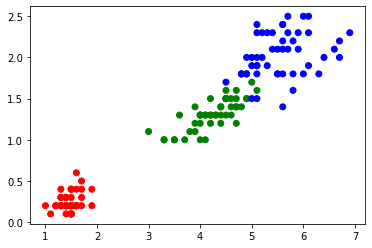

In [6]:
petallength = iris.petallength.values
petalwidth = iris.petalwidth.values
types = iris.species_num.values
color = [make_color(x) for x in types]

plt.scatter(petallength, petalwidth, color=color)
plt.show()

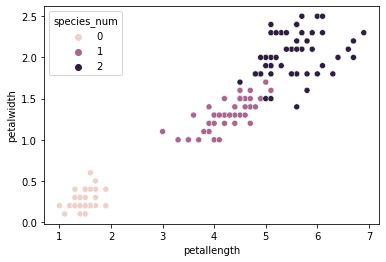

In [7]:
sns.scatterplot(x="petallength", y="petalwidth", data=iris, hue="species_num")
plt.show()

In [8]:
X = iris.drop(['iris', 'species_num'], axis=1)
y = iris.species_num

In [9]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
# tim k phu hop
list_k = []
list_acc = []
# list_score_train
# list_score_test
# |train - test| <<
for K_value in range(2, 9):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    list_acc.append(acc)
    print("Accuracy is", accuracy_score(y_test, y_pred)*100, "% for K-value:", K_value)

positions = list_acc.index(max(list_acc))
k = list_k[positions]

print("\n The optimal number of neighbors is %d with %0.1f%%" %(k, list_acc[positions]))

Accuracy is 100.0 % for K-value: 2
Accuracy is 100.0 % for K-value: 3
Accuracy is 100.0 % for K-value: 4
Accuracy is 100.0 % for K-value: 5
Accuracy is 100.0 % for K-value: 6
Accuracy is 96.66666666666667 % for K-value: 7
Accuracy is 100.0 % for K-value: 8

 The optimal number of neighbors is 2 with 100.0%


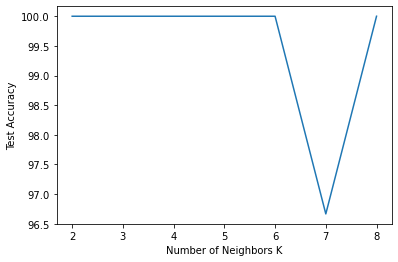

In [13]:
plt.plot(list_k, list_acc)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Test Accuracy")
plt.show()

In [14]:
# select k => ap dung model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
print("Accuracy is", accuracy_score(y_test, y_pred)*100, "%")
print("The Training R^2 score is:", knn.score(X_train, y_train))
print("The Testing R^2 score is:", knn.score(X_test, y_test))

Accuracy is 100.0 %
The Training R^2 score is: 0.9666666666666667
The Testing R^2 score is: 1.0


In [17]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})

In [18]:
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [19]:
x_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = knn.predict(x_now)
y_now

array([0], dtype=int64)

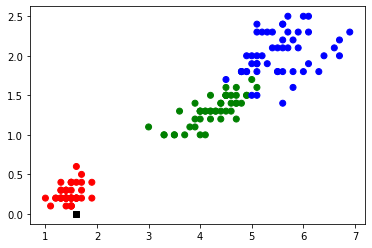

In [21]:
types = iris.species_num.values
color = [make_color(x) for x in types]

plt.scatter(petallength, petalwidth, color=color)
plt.scatter(x_now[0][2], y_now, color='k', marker='s')
plt.show()